# JSON Tutorial
JSON stands for Javascript Object Notation. It is commonly used for passing data around on the web (followed by XML as a close second, eXtensible Markup Language). 

JSON is really just a dictionary:
* It is a collection of key-value pairs
* Keys are strings
* Values can be one of several data types
    * Strings
    * Arrays
    * JSON objects
    * Bools
    * Numerics
    * etc. 
    
Let's take a look at some sample JSON data:

```json
{
    "TimestampUTC": "2020-03-24T00:27:00Z",
    "TimestampSubjectTZ": "2020-03-23T20:27:00",
    "Calories": 0.0234859050963356,
    "HR": 0.0,
    "Lux": null,
    "Steps": 0.0,
    "Wear": true,
    "x": 0,
    "y": 35,
    "z": 0,
    "AxisXCounts": 0,
    "AxisYCounts": 35,
    "AxisZCounts": 0
  }
```

The above JSON object represents one minute of wearable data collected from a device called an Actigraph. The [actigraph_data.json](https://raw.githubusercontent.com/GonzagaCPSC222/U4-Visualizing-Data/master/files/actigraph_data.json) file contains an array of five minutes of such JSON objects.

We can open this data using pandas `read_json()` function. This will give us `DataFrame`

In [1]:
import pandas as pd 

df = pd.read_json("actigraph_data.json")
print(df)

   AxisXCounts  AxisYCounts  AxisZCounts  Calories  HR  Lux  Steps  \
0            0           35            0  0.023486   0  NaN      0   
1           44           63           55  0.042275   0  NaN      0   
2            0            0            0  0.000000   0  NaN      0   
3          193          334           71  0.224123   0  NaN      0   
4           30           23            0  0.015434   0  NaN      0   

   TimestampSubjectTZ        TimestampUTC  Wear    x    y   z  
0 2020-03-23 20:27:00 2020-03-24 00:27:00  True    0   35   0  
1 2020-03-23 20:28:00 2020-03-24 00:28:00  True   44   63  55  
2 2020-03-23 20:29:00 2020-03-24 00:29:00  True    0    0   0  
3 2020-03-23 20:30:00 2020-03-24 00:30:00  True  193  334  71  
4 2020-03-23 20:31:00 2020-03-24 00:31:00  True   30   23   0  


## APIs
API stands for application programming interface. An API exposes functions for programmers to use to query data, compute something, set a value, etc. from/on a server.

We are gonna do an API demo, then come back and write code to fetch data from a different API. 

List of public APIs: https://github.com/public-apis/public-apis 

We worked first with the open trivia database API: https://opentdb.com/api_config.php

Now let's move on to a more comprehensive API demo.

## JSON Example: Seattle Quality of Living
Let's work with the [Teleport API](https://developers.teleport.org/). From the website: 
>WELCOME TO TELEPORT FOR DEVELOPERS!
We're building the largest and most up-to-date quality of life database for Planet Earth using 300+ different data dimensions from 70+ different sources, all updated periodically. Our global sources include the World Bank, World Health Organization, United Nations, Reporters Without Borders, OpenStreetMap, GeoNames, OpenFlights, Heritage Foundation, AngelList, Airbnb, Seed-DB and others. On top of these we augment the sets with things like laws and regulations, real estate prices and recruitment market data from local sources from countries around the world.  
We would love to see what you guys can build on top of that data! We're starting off with providing easy access to Teleport City Scores (the highest level of abstraction for our collected data) and will continue to open up access to lower layers as we go along.

Let's get started!!

We are going need a `ua_id` "urban area ID" for Seattle. It is `slug:seattle` (I got this from the list of all urban areas).

Here is the url we need: https://api.teleport.org/api/urban_areas/slug%3Aseattle/scores/ 

We want to open this URL in Python, read the JSON from the server response, then plot the category data for Seattle!!

In [21]:
import urllib.request # part of the Python standard library

# from teleport API
url = "https://api.teleport.org/api/urban_areas/slug%3Aseattle/scores/"

# open the URL and read the server's response
data = urllib.request.urlopen(url).read().decode() 
# default encoding is utf-8
#print(data)

# write data out to a file
filename = "seattle_scores.json"
outfile = open(filename, "w")
outfile.write(data)
outfile.close()

Now that we have the JSON out a file, let's try to read it in with pandas....

In [23]:
import pandas as pd 

#df = pd.read_json(filename)
# doesn't work :(

In [28]:
import json
# parse the JSON manually...

# open the seattle_scores.json file with json (module)
infile = open(filename, "r")
json_object = json.load(infile)
#print(json_object) # like a dictionary

# we want to the categories array
categories_array = json_object["categories"]
#print(categories_array)
cat_ser = pd.Series(dtype=float)
for category_object in categories_array:
    name = category_object["name"]
    score = category_object["score_out_of_10"]
    cat_ser[name] = score

# task: store the name/score pairs in a series
# make a bar chart for the series
#print(cat_ser)

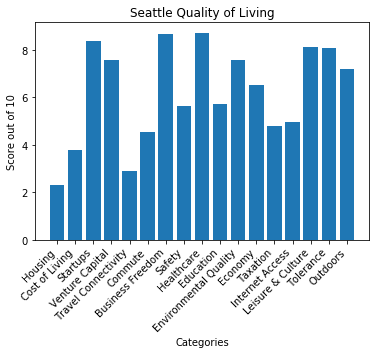

In [31]:
# now let's plot!!
import matplotlib.pyplot as plt

plt.bar(cat_ser.index, cat_ser)
plt.xticks(rotation=45, horizontalalignment="right")
plt.title("Seattle Quality of Living")
plt.xlabel("Categories")
plt.ylabel("Score out of 10")

plt.show()

Seattle's stengths include:
* Start ups
* Venture capital
* Business Freedom

Weaknesses include:
* Housing
* Travel connectivity
* Commute